## Lab | Customer Analysis Round 7
<p>For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.<br>
Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:<br>
Use the concept of multicollinearity and remove insignificant variables<br><br>
Use a different method of scaling the numerical variables<br>
Use a different ratio of train test split<br>
Use the transformation on numerical columns which align it more towards a normal distribution<br>
Get the data<br>
We are using the marketing_customer_analysis.csv file.<br>
Dealing with the data<br>
Already done in rounds 2 to 7.v
Bonus: Build a function, from round 2 and round 7, to clean and process the data.<br>
Explore the data<br>
Done in the round 3.<br>
Modeling<br>
Description:<br>
Try to improve the linear regression model.<br>

In [86]:
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df=pd.read_csv('marketing_customer_analysis.csv')
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [87]:
#Dealing with the data


df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [88]:
df.columns=[c.lower().replace(' ', '_') for c in df.columns]
df=df.drop(columns=['unnamed:_0','customer'],axis=1)
df=df.dropna()
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,Urban,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,Suburban,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,Urban,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,Suburban,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,Suburban,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [89]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,Urban,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,Suburban,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,Urban,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,Suburban,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [90]:
##Separamos las variables numericas y Categoricas

data_num= df.select_dtypes(exclude=["object"])
data_num.isnull().sum()

customer_lifetime_value          0
effective_to_date                0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [91]:
data_cat= df.select_dtypes(include=["object"])
data_cat.isnull().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
vehicle_type        0
dtype: int64

In [92]:
#use the concept of multicollinearity and remove insignificant variables
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.824774,customer_lifetime_value
1,2.277513,income
2,6.349181,monthly_premium_auto
3,2.754926,months_since_last_claim
4,3.260118,months_since_policy_inception
5,1.171173,number_of_open_complaints
6,2.286219,number_of_policies


Cómo interpretar los valores de VIF

El valor de VIF comienza en 1 y no tiene límite superior. Una regla general para interpretar los VIF es la siguiente:

Un valor de 1 indica que no hay correlación entre una variable explicativa dada y cualquier otra variable explicativa en el modelo. Un valor entre 1 y 5 indica una correlación moderada entre una variable explicativa dada y otras variables explicativas en el modelo, pero esto a menudo no es lo suficientemente grave como para requerir atención. Un valor mayor que 5 indica una correlación potencialmente severa entre una variable explicativa dada y otras variables explicativas en el modelo. En este caso, las estimaciones de los coeficientes y los valores p en el resultado de la regresión probablemente no sean confiables.

In [93]:
# Se elimina monthly premium auto, ya que indica una correlacion alta
data_num= data_num.drop(['monthly_premium_auto'], axis=1)

In [94]:
corr_matrix=data_num.corr()
corr_matrix

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.015914,0.029199,0.022465,-0.034924,0.015397,0.228579
income,0.015914,1.000000,-0.010556,-0.007987,0.001149,-0.013199,-0.355311
months_since_last_claim,0.029199,-0.010556,1.000000,-0.036879,-0.000364,0.001089,-0.011449
months_since_policy_inception,0.022465,-0.007987,-0.036879,1.000000,-0.001965,-0.009029,0.012610
number_of_open_complaints,-0.034924,0.001149,-0.000364,-0.001965,1.000000,0.014388,-0.003433
number_of_policies,0.015397,-0.013199,0.001089,-0.009029,0.014388,1.000000,0.002864
total_claim_amount,0.228579,-0.355311,-0.011449,0.012610,-0.003433,0.002864,1.000000


Text(0.5, 1.0, 'Correlation')

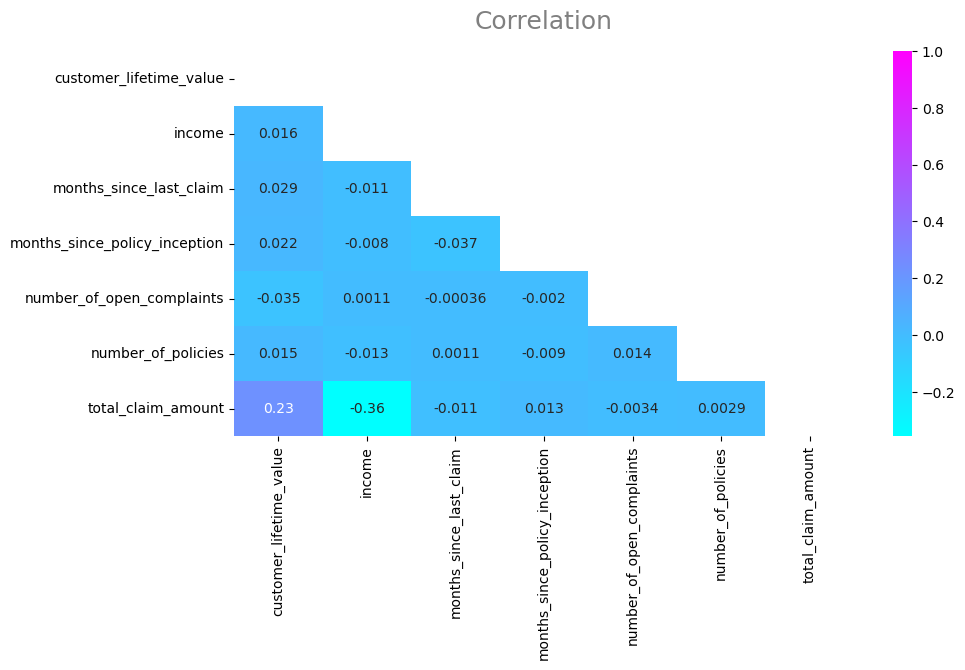

In [95]:
plt.figure(figsize=(10,5))
mascara=np.triu(np.ones_like(data_num.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(data_num.corr(), mask=mascara, vmax=1, annot=True, cmap='cool') #podemos establecer el valor maximo y minimo
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16, color='grey')

#Podemos observar que todas las variables tienen una correlacion baja a  moderada, por lo que no sera necesario eliminar columnas

In [ ]:
#En este caso no tenemos nulos en data_num como hemso visto antes y no es necesario tomar otra acción

In [98]:
#Separamos entre variable independiente( Features/Características) y variable dependiente (objetivo/target)
X=data_num.drop(columns=['effective_to_date', 'total_claim_amount'], axis=1)
y=data_num.total_claim_amount


In [ ]:
#Graficamos variables numericas

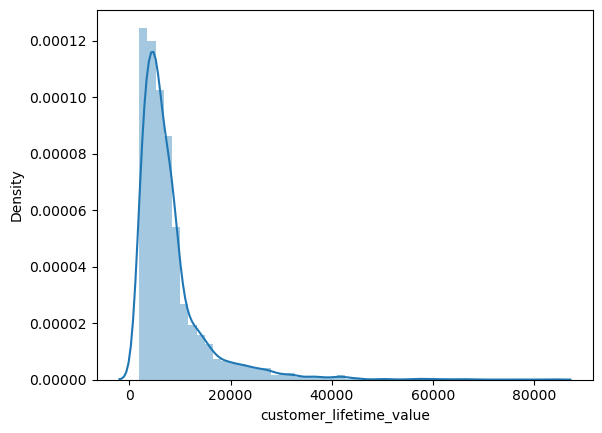

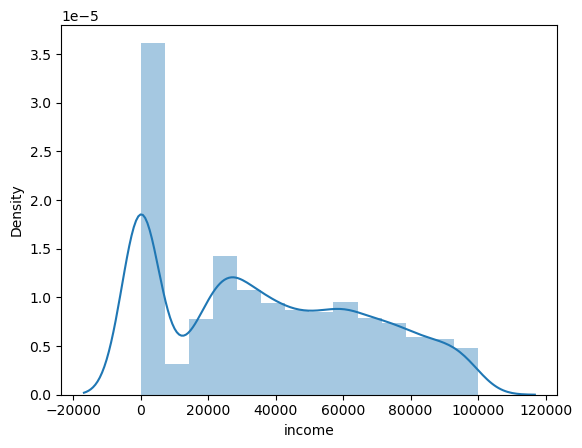

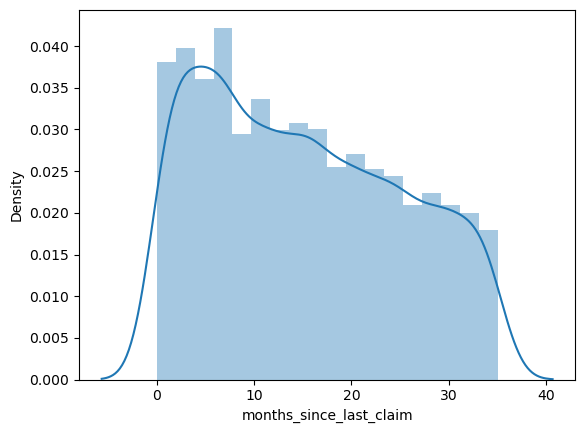

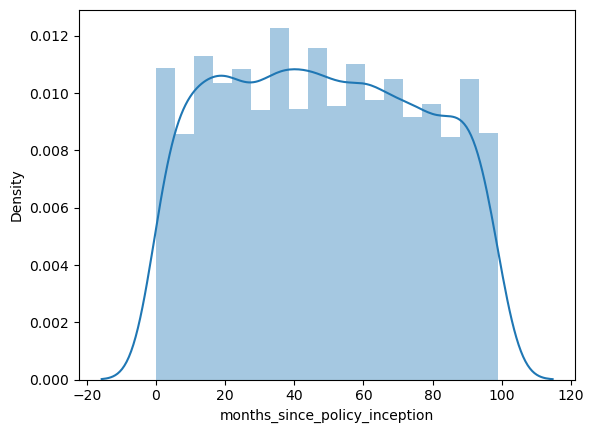

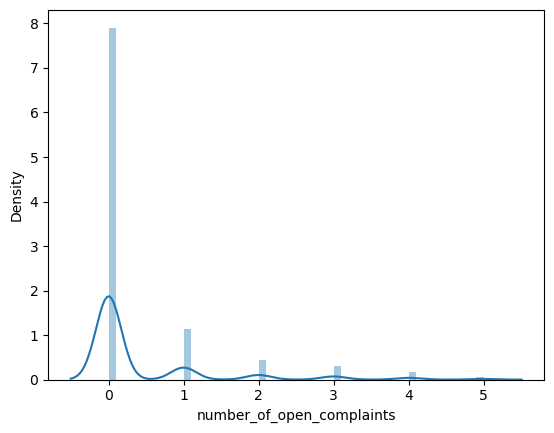

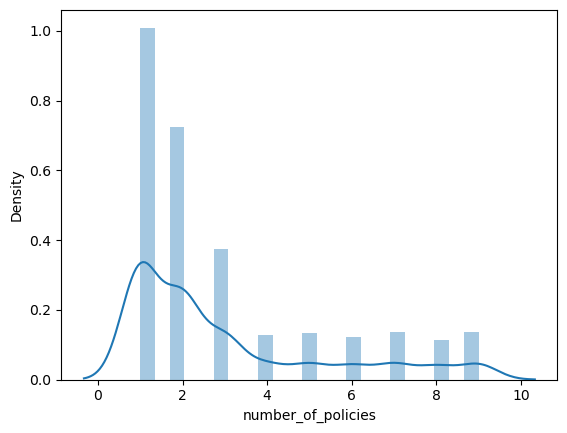

In [99]:
for i in range(6):
    sns.distplot(X.iloc[:,i])
    plt.show()

Normalizacion 

In [100]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X)
X_num1=transformer.transform(X)

data_norm=pd.DataFrame(X_num1) 

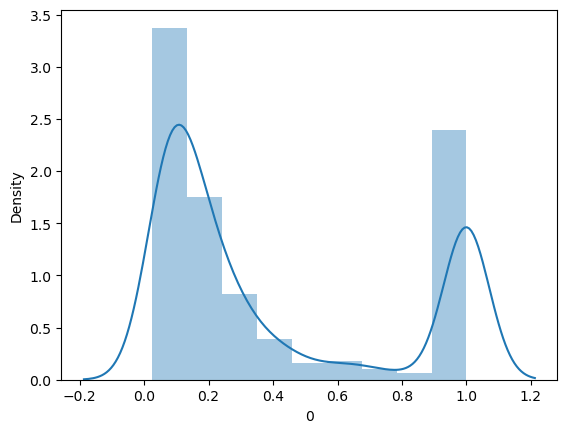

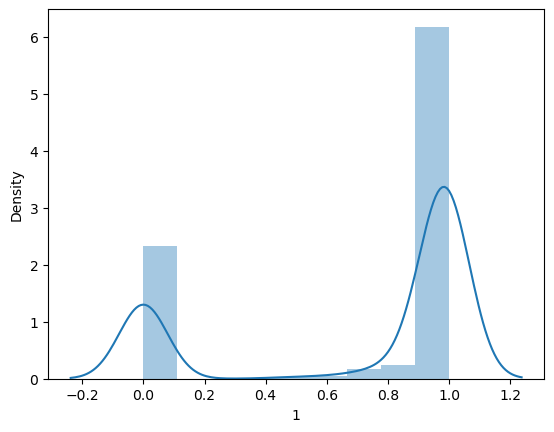

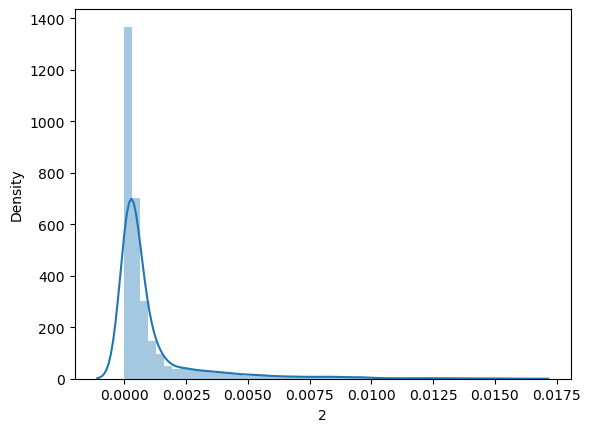

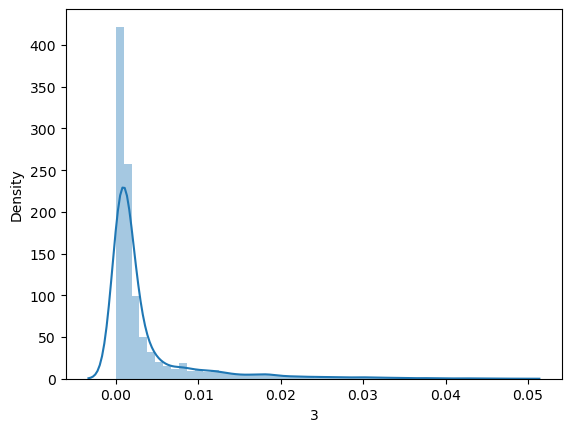

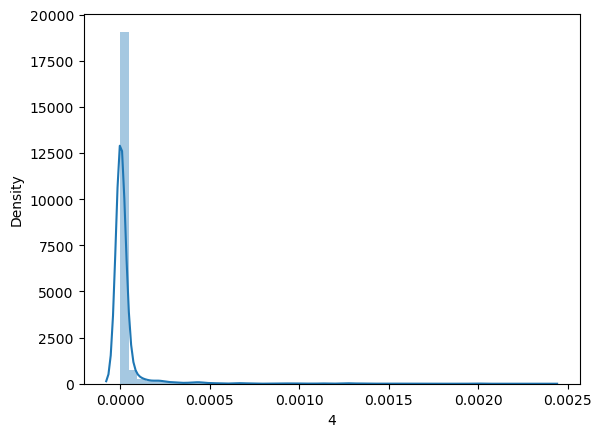

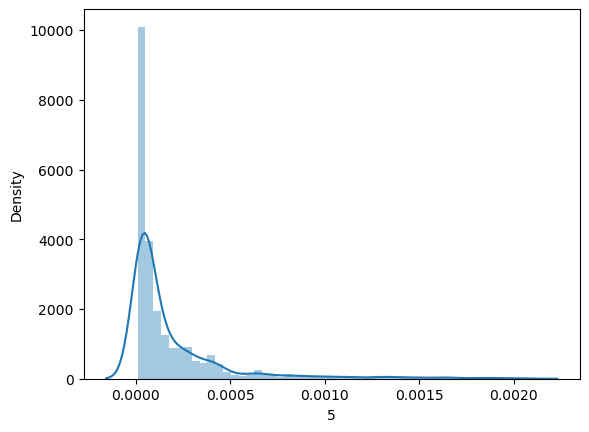

IndexError: single positional indexer is out-of-bounds

In [102]:
for i in range(7):
    sns.distplot(data_norm.iloc[:,i])
    plt.show()

In [ ]:
#Y ahemso visto que la coolumnas categoricas no tienen nulos y hemso elimnido las qu eno servian
#Visualizamos categoricas

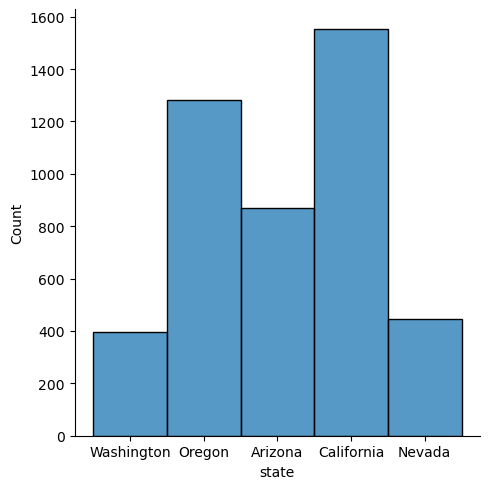

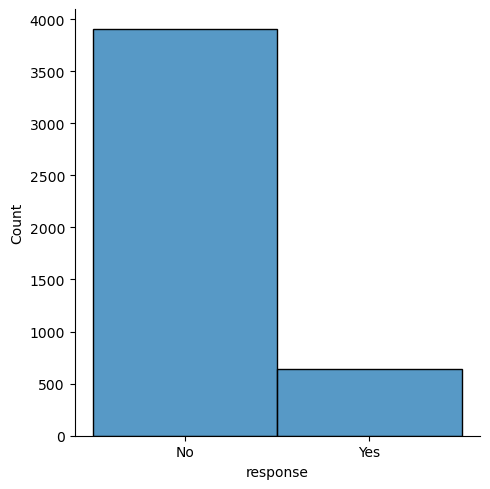

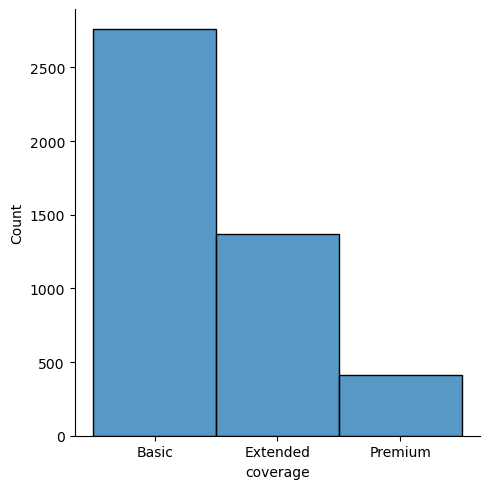

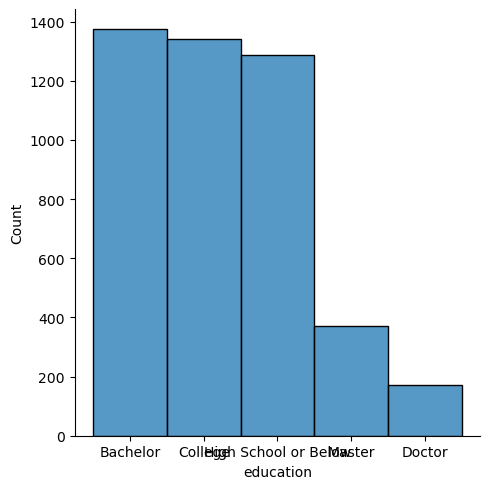

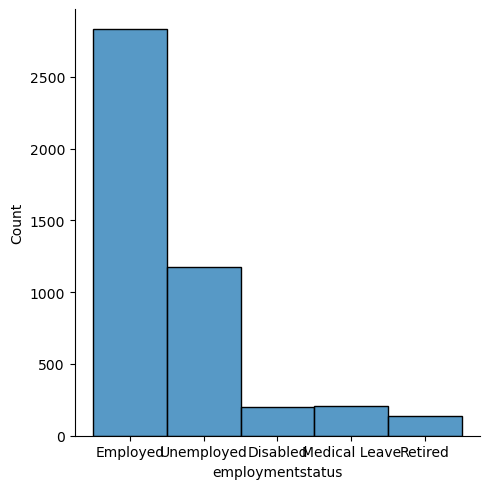

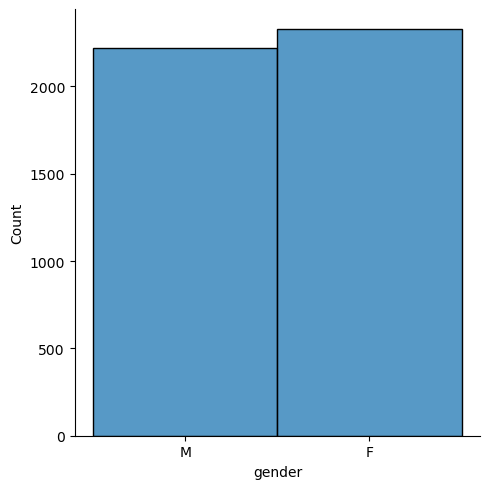

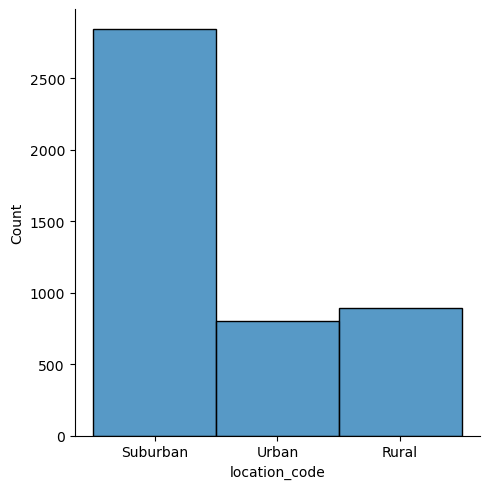

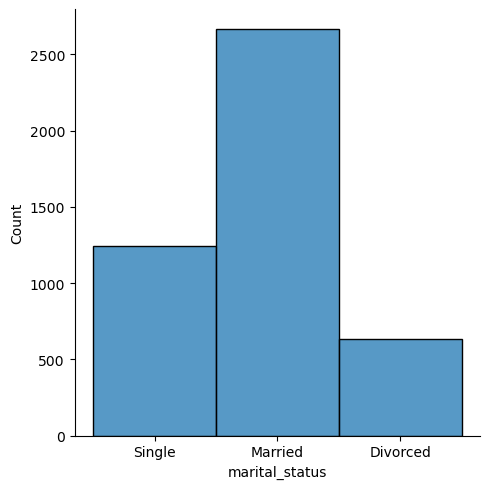

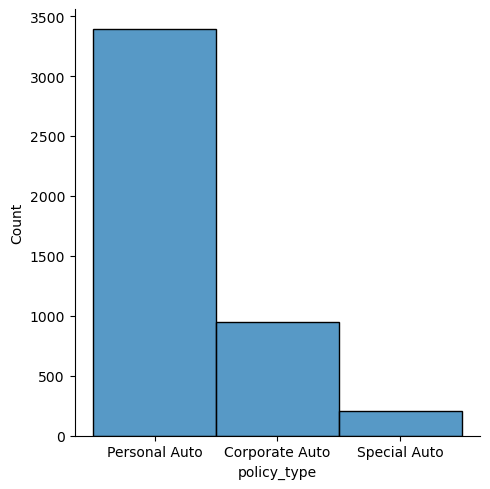

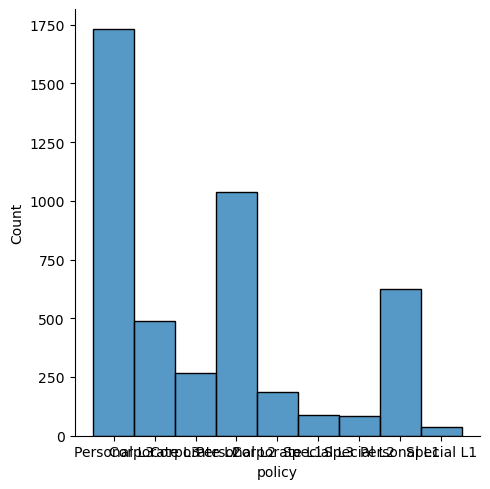

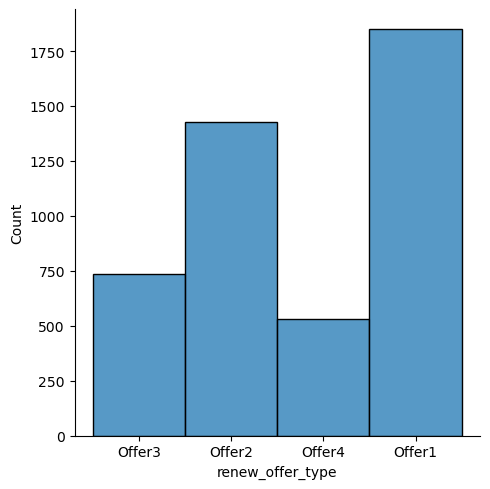

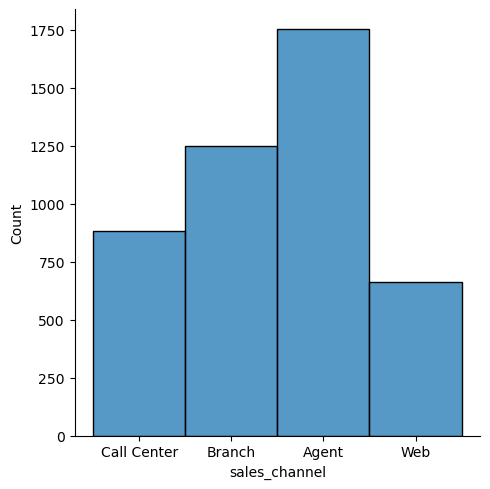

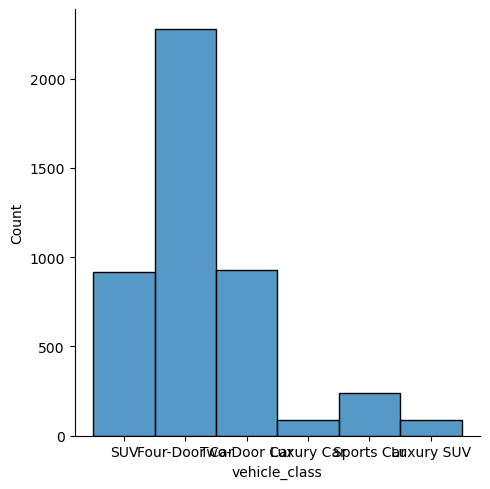

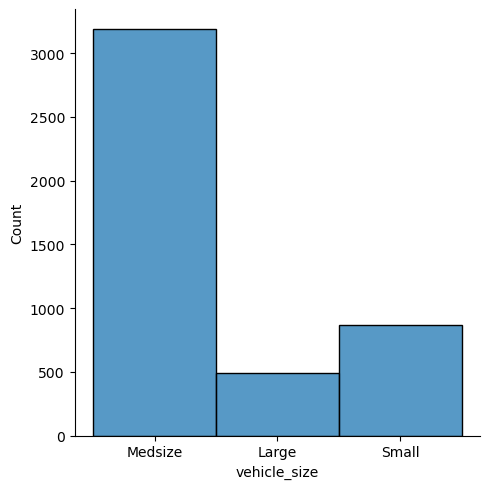

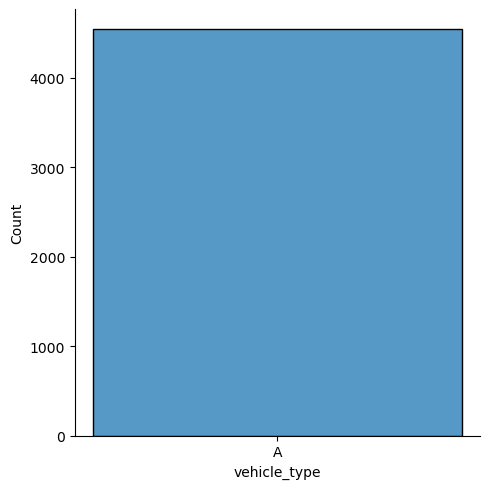

In [103]:
for i in data_cat.columns:
  sns.displot(data_cat[i])

In [ ]:
#Aplicamos label encoder y concatenamos num y cat

In [105]:
from sklearn import preprocessing
data_cat=data_cat.apply(preprocessing.LabelEncoder().fit_transform)
data_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
2,4,0,0,0,1,1,1,2,1,5,2,2,3,1,0
3,3,1,1,1,1,1,1,2,0,2,1,1,0,1,0
10,0,0,1,3,1,1,2,1,0,2,1,1,3,0,0
13,1,0,0,4,1,1,1,2,1,5,3,2,5,1,0
16,1,0,0,3,1,0,2,1,1,5,3,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,1,0,1,3,1,0,1,1,1,4,1,0,0,1,0
10903,0,0,0,1,1,1,1,1,1,4,1,1,5,1,0
10904,2,0,0,3,4,1,1,2,1,4,0,1,2,1,0
10906,3,0,0,1,1,0,2,1,1,5,1,1,0,1,0


In [107]:
X=np.concatenate((data_norm,data_cat),axis=1)
X.shape

(4543, 21)

In [ ]:
#Entrenamos nuestro modelo

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
#Aplicamos la Regresion lineal

In [109]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)

In [ ]:
#Obtenemos las predicciones y Obtenemos R^2 y Errores Cuadraticos Medios

In [110]:
predictions=lm.predict(X_test)

In [111]:
r2_score(y_test,predictions) 

0.32487679460643526

In [112]:
mse=mean_squared_error(y_test,predictions)
print(mse)

52674.15099495599


In [113]:
predictions=lm.predict(X_train)
r2_score(y_train,predictions)

0.35570793332167694

In [114]:
mse=mean_squared_error(y_train,predictions)
print(mse) 

57992.767254211045


In [ ]:
Podemos observar que nuestro modelo es malo, por lo que intentaremos en vez de normalizar, estandarizar los datos

In [ ]:
#Normalizamos las columnas

In [117]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_num2=scale.fit_transform(X)
data_standard=pd.DataFrame(X_num2) 

In [ ]:
#Concatenamos las variables numericas y categoricas

In [119]:
X2=np.concatenate((data_standard,data_cat),axis=1)
X2.shape

(4543, 36)

In [ ]:
#Entrenamos nuestro modelo

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.25, random_state=42)

In [ ]:
#Aplicamos la Regresion lineal

In [121]:
lm=linear_model.LinearRegression()

In [122]:
model=lm.fit(X_train,y_train)

In [ ]:
#Predicciones y Obtenemos R^2 y Errores Cuadraticos Medios

In [123]:
predictions=lm.predict(X_test)

In [124]:
r2_score(y_test,predictions)

0.3246536754320536

In [125]:
mse=mean_squared_error(y_test,predictions)
print(mse)

52691.559096154946


In [126]:
predictions=lm.predict(X_train)
r2_score(y_train,predictions)

0.3557045643402188

In [127]:
mse=mean_squared_error(y_train,predictions)
print(mse)

57993.07049643253


In [ ]:
#R2 ha bajado un poco pero no ha habido mucho cambio aplicamso BoxCox

In [ ]:
#Para aplicar boxcox mi data tiene que ser positiva, por lo que la columna income, todos los valores negativos o cero  los reemplazare con la media

In [130]:
income_mean=data_num['income'].mean()
mslc_mean=data_num['months_since_last_claim'].mean()
mspi_mean=data_num['months_since_policy_inception'].mean()
nooc_mean=data_num['number_of_open_complaints'].mean()
data_num['income']=data_num['income'].replace(0,income_mean)
data_num['months_since_last_claim']=data_num['months_since_last_claim'].replace(0,mslc_mean)
data_num['months_since_policy_inception']=data_num['months_since_policy_inception'].replace(0,mspi_mean)
data_num['number_of_open_complaints']=data_num['number_of_open_complaints'].replace(0,nooc_mean)

In [135]:
from scipy import stats
a,lmbda1=stats.boxcox(data_num['customer_lifetime_value'])
b,lmbda2=stats.boxcox(data_num['income'])
c,lmbda3=stats.boxcox(data_num['months_since_last_claim'])
d,lmbda4=stats.boxcox(data_num['months_since_policy_inception'])
e,lmbda5=stats.boxcox(data_num['number_of_open_complaints'])
f,lmbda6=stats.boxcox(data_num['number_of_policies'])

In [136]:
Lambda = [lmbda1,
          lmbda2,
          lmbda3,
          lmbda4,
          lmbda5,
          lmbda6,

         ]


a = pd.Series(a)
b = pd.Series(b)
c = pd.Series(c)
d = pd.Series(d)
e = pd.Series(e)
f = pd.Series(f)


data_boxcox = pd.concat([a,b,c,d,e,f,],axis=1)

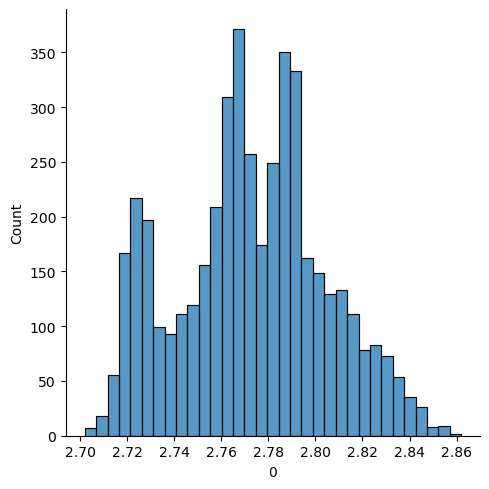

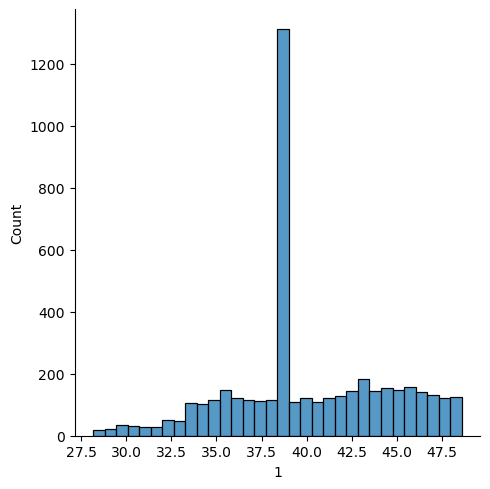

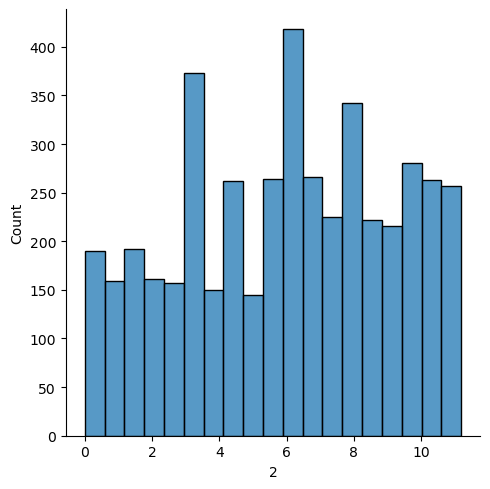

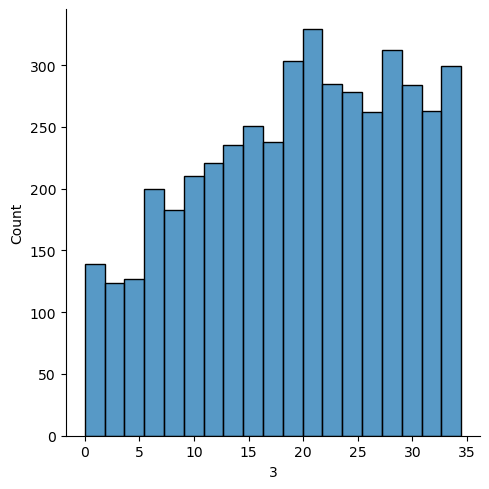

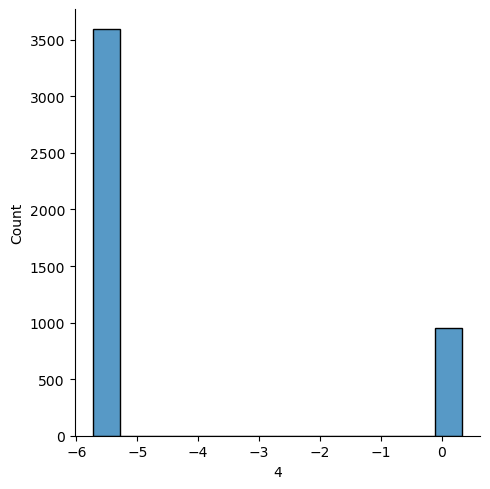

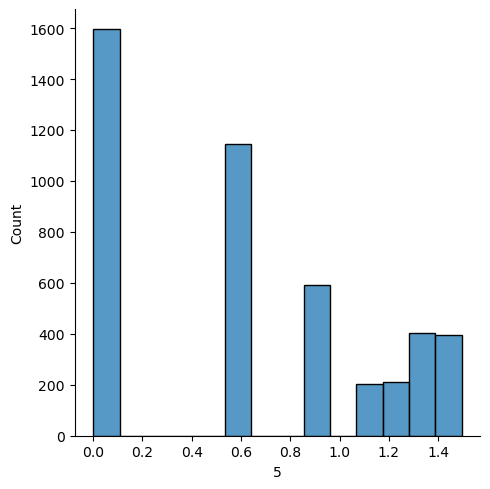

In [137]:
for i in data_boxcox.columns:
  sns.displot(data_boxcox[i])

Concatenamos las variables numericas y categoricas

In [138]:
X3=np.concatenate((data_boxcox,data_cat),axis=1)
X3.shape

(4543, 21)

In [140]:
#Entrenamos nuestro modelo
X_train,X_test,y_train,y_test=train_test_split(X3,y,test_size=0.25, random_state=42)

In [141]:
#Aplicamos la Regresion lineal
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)

In [142]:
#Obtenemos las predicciones y Obtenemos R^2 y Errores Cuadraticos Medios
predictions=lm.predict(X_test)

In [143]:
r2_score(y_test,predictions)

0.34309179919893107

In [144]:
mse=mean_squared_error(y_test,predictions)
print(mse)

51252.98831736795


In [145]:
predictions=lm.predict(X_train)
r2_score(y_train,predictions)

0.3673564515063876

In [146]:
mse=mean_squared_error(y_train,predictions)
print(mse)

56944.28343937052


In [ ]:
#Los tres modelos son muy similares, no hay ninguna significatiamente mejor, hbrai que serguri intentar mejorarlo para acercarnos mas a la distribucion normal 